# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [197]:
import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [198]:
# Run this code:
sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [199]:
# Your code here:
sensor.head(10)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
5,1.476302,-0.700807,0.669443,0.760912,0.644835,-0.072116,0.187742,-0.763656,0.226057,0.168241,0.145906,0.012455
6,1.455153,-0.694408,0.662593,0.763300,0.639930,-0.088666,0.343096,-0.803820,0.278468,0.079382,-0.026344,-0.195590
7,1.441702,-0.690710,0.656459,0.764380,0.637084,-0.099229,0.176202,-0.172756,0.056415,0.069360,0.072678,-0.102920
8,1.443440,-0.691905,0.651196,0.763796,0.638005,-0.097803,0.274786,0.446585,-0.132766,0.072889,0.079921,-0.075323
9,1.443071,-0.693039,0.638198,0.763042,0.638878,-0.097993,0.633672,0.316372,-0.115137,0.098347,-0.017021,-0.197310


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [200]:
# Your code here:
sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [201]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [202]:
# Your code here:
rows = sensor.shape[0]
seriesIndex = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods = rows)
seriesIndex
# Veo como aun la freq no la ha inferido porque no tengo indexado el datetime. Mas abajo lo reconocera.

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [203]:
# Your code here:
sensor.index = pd.DatetimeIndex(seriesIndex, freq='infer')
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


In [204]:
sensor.index
# Una vez indexado el datetime ya reconoce como frecuencia los segundos.

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='S')

In [205]:
#sensor['2018-01-01 00:00:00':'2018-01-01 00:00:00']
# al ser un dataframe de tipo datetime reconoce las filas por momento exacto o un rango de momentos.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


Figure(432x288)


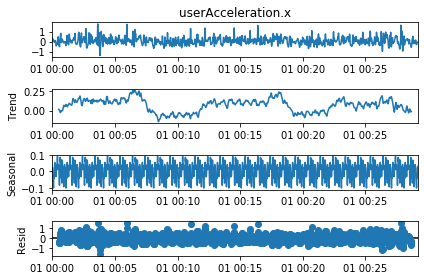

In [206]:
# Your code here:
import statsmodels.api as sm
data = sensor['userAcceleration.x']
res = sm.tsa.seasonal_decompose(data, freq=60)
print(res.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  


Figure(432x288)


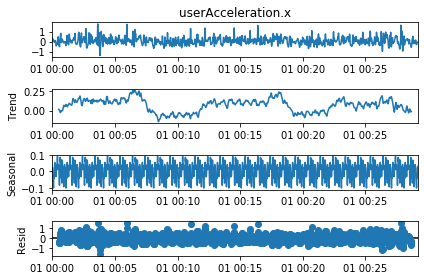

In [207]:
data2 = sensor['rotationRate.x']
res2 = sm.tsa.seasonal_decompose(data2, freq=60)
print(res.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

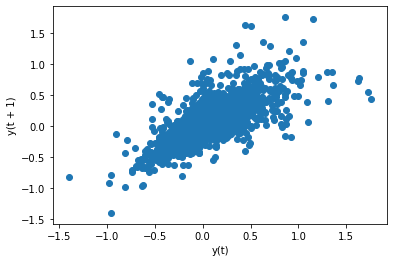

In [208]:
# Your code here:
import matplotlib.pyplot as plt
plt.figure()
pd.plotting.lag_plot(sensor["userAcceleration.x"])

Create a lag plot for `rotationRate.x`

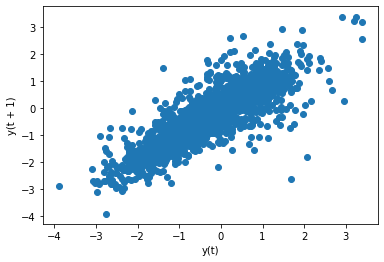

In [209]:
# Your code here:
plt.figure()
pd.plotting.lag_plot(sensor["rotationRate.x"])

What are your conclusions from both visualizations?

In [219]:
# Your conclusions here:
'''En cada uno de los casos se observa que puede existir relación entre un punto y su punto anterior. Se rechaza la hipotesis de que sean variables aleatorias'''

'En cada uno de los casos se observa que puede existir relación entre un punto y su punto anterior. Se rechaza la hipotesis de que sean variables aleatorias'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [211]:
test_adfullerUser = adfuller(sensor["userAcceleration.x"], autolag='AIC')
print(f'adf: {test_adfullerUser[0]}')
print(f'pvalue: {test_adfullerUser[1]}')
print(f'usedlag: {test_adfullerUser[2]}')
print(f'nobs: {test_adfullerUser[3]}')
print(f'critical values: {test_adfullerUser[4]}')
print(f'icbest: {test_adfullerUser[5]}')

adf: -17.95799408616976
pvalue: 2.823439483037483e-30
usedlag: 4
nobs: 1746
critical values: {'1%': -3.434100824760071, '5%': -2.863196780129223, '10%': -2.5676520210882936}
icbest: -727.6140124402791


In [212]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

stationaryCheck = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
stationaryCheck(sensor['userAcceleration.x'])

'Stationary'

In [213]:
#test_adfullerRotation = adfuller(sensor["rotationRate.x"], autolag='AIC')
#print(f'adf: {test_adfullerRotation[0]}')
#print(f'pvalue: {test_adfullerRotation[1]}')
#print(f'usedlag: {test_adfullerRotation[2]}')
#print(f'nobs: {test_adfullerRotation[3]}')
#print(f'critical values: {test_adfullerRotation[4]}')
#print(f'icbest: {test_adfullerRotation[5]}')
test_adfullerRotation = adfuller(sensor["rotationRate.x"])
print(f'pvalue: {test_adfullerRotation[1]}')

pvalue: 6.3202303359123905e-06


In [214]:
stationaryCheck2 = lambda X: "Not-Stationary" if adfuller(X)[1] > 0.05 else "Stationary"
stationaryCheck2(sensor['rotationRate.x'])

'Stationary'

What are your conclusions from this test?

In [1]:
# Your conclusions here:
'''Tomando en cuenta el p-valor noto que son valores muy aproximados a 0 (en el caso de User mas aun), por lo tanto permite rechazar la hipotesis nula. Son estacionarios.'''

'Tomando en cuenta el p-valor noto que son valores muy aproximados a 0 (en el caso de User mas aun), por lo tanto permite rechazar la hipotesis nula. Son estacionarios.'

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [216]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA

realidad, futuro = (sensor['userAcceleration.x'])[:-10], (sensor['userAcceleration.x'])[-10:]
model = ARMA(realidad, order=(2, 1))
model_fit = model.fit(disp=False)

predictions_ARMA = model_fit.predict(len(realidad), len(realidad)+len(futuro)-1)
    
df=pd.DataFrame({
        'Futuro':futuro,
        'Prediccion': predictions_ARMA,
        'Diferencia Pred - Fut': predictions_ARMA - futuro
    })
df   

,Futuro,Prediccion,Diferencia Pred - Fut
2018-01-01 00:29:01,0.149749,0.173149,0.023400
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421
2018-01-01 00:29:10,-0.065011,0.064493,0.129504


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [217]:
# Your code here:
from sklearn.metrics import mean_squared_error

# squared => If True returns MSE value, if False returns RMSE value.
for col in df.columns:
    mse = mean_squared_error(df.Futuro, df.Prediccion)
    rmse = np.sqrt(mse)
    print(f"{col} ->  MSE={mse} RMSE={rmse}")

Futuro ->  MSE=0.050759474733775733 RMSE=0.22529863455816979
Prediccion ->  MSE=0.050759474733775733 RMSE=0.22529863455816979
Diferencia Pred - Fut ->  MSE=0.050759474733775733 RMSE=0.22529863455816979
